#### Business Problem

In a world where there are many new technology companies starting up, how people feel about a brand can tell us a lot about whether they'll buy their products. This is important for companies like GoldenGroup that invest in technology. They've asked us to build them a predictive model that can read recent tweets about different technology products and figure out if people like them or not. They want this program to work for all kinds of brands, so they can use it to decide which ones to look into more closely for possible investment. GoldenGroup only cares about whether people feel good about the brand because they think people buy things they like. Here GoldenGroup's objective is determine what type of investments they can make with Apple and google positive tweets.

#### Data Understanding:


The dataset comes from CrowdFlower via data.world. Human raters rated the sentiment in over 8721 Tweets as positive, negative, or neither. The tweets included are sent out during the South by South West conference, mostly about Google and Apple products. The data was put together in 2011.

Tweets are usually short and packed with emotions. They can capture consumer's real time response to a brand very well. South by Southwest showcases all the newest technology and allows consumers to compare the products of major tech companies side by side, which can reduce their biases to some degree.

We engineered our target into two classes: tweets with positive sentiment and tweets with negative sentiment. We only care about whether the tweet is positive because positive emotion drives sales, which can translate into return on investment.

Data Source: https://data.world/crowdflower/brands-and-product-emotions

#### Objective :

- Our objective is to come up with predictive model which has high accuracy of determining positive sentiment tweets.
- Come up with investment options for GoldenGroup from the positive tweets so they can confidently invest in products and services accordingly. 


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import TweetTokenizer
import string
from nltk import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from math import pi
from wordcloud import WordCloud
from PIL import Image
import re
from nltk.tokenize import word_tokenize

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV

In [4]:
from imblearn.over_sampling import SMOTE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix,\
                            classification_report, plot_roc_curve,\
                            mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC, SVC

import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
df_tweet = pd.read_csv('crowdflower-brands-and-product-emotions/data/judge_1377884607_tweet_product_company.csv')


In [6]:
df_tweet

tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
8716                      Ipad everywhere. #SXSW {link}   
8717  Wave, buzz... RT @mention We interrupt your re...   
8718  Google's Zeiger, a physician never reported po...   
8719  Some Verizon iPhone customers complained their...   
8720  �ϡ�����_��ʋ�΋�ҋ�������⋁_��������_���RT @mentio...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...                              ...   
8716                            iPad   
8717                             NaN   
8718                             NaN   
8719                             NaN   
8720                             NaN   

     is_there_an_emotion_directed_at_a_brand_or_product  
0                                      Negative emotion  
1                                      Positive emotion  
2                                      Positive emotion  
3                                      Negative emotion  
4                                      Positive emotion  
...                                                 ...  
8716                                   Positive emotion  
8717                 No emotion toward brand or product  
8718                 No emotion toward brand or product  
8719                 No emotion toward brand or product  
8720                 No emotion toward brand or product  

[8721 rows x 3 columns]

In [7]:
df_tweet.head(10)

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   
5  @teachntech00 New iPad Apps For #SpeechTherapy...   
6                                                NaN   
7  #SXSW is just starting, #CTIA is around the co...   
8  Beautifully smart and simple idea RT @madebyma...   
9  Counting down the days to #sxsw plus strong Ca...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   
5                             NaN   
6                             NaN   
7                         Android   
8              iPad or iPhone App   
9                           Apple   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion  
5                 No emotion toward brand or product  
6                 No emotion toward brand or product  
7                                   Positive emotion  
8                                   Positive emotion  
9                                   Positive emotion

Rename the columns for better interpretability.


In [8]:
df_tweet.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [9]:
df_tweet.columns = ['Tweet', 'Company/Product', 'Sentiment']

In [10]:
df_tweet.columns

Index(['Tweet', 'Company/Product', 'Sentiment'], dtype='object')

In [11]:
df_tweet.head()

Tweet     Company/Product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

          Sentiment  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion

In [12]:
df_tweet['Company/Product'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

### Missing values and duplicates

In [13]:
df_tweet['Tweet']

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
8716                        Ipad everywhere. #SXSW {link}
8717    Wave, buzz... RT @mention We interrupt your re...
8718    Google's Zeiger, a physician never reported po...
8719    Some Verizon iPhone customers complained their...
8720    �ϡ�����_��ʋ�΋�ҋ�������⋁_��������_���RT @mentio...
Name: Tweet, Length: 8721, dtype: object

In [14]:
df_tweet['Tweet'].value_counts()

RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                                                5
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                                             4
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW                                                4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW                                                             3
I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone                              2
                                                                                                                                                             ..
RT @mention Download 20+ FREE tracks fro

In [15]:
df_tweet["Sentiment"]


0                         Negative emotion
1                         Positive emotion
2                         Positive emotion
3                         Negative emotion
4                         Positive emotion
                       ...                
8716                      Positive emotion
8717    No emotion toward brand or product
8718    No emotion toward brand or product
8719    No emotion toward brand or product
8720    No emotion toward brand or product
Name: Sentiment, Length: 8721, dtype: object

In [16]:
df_tweet['Sentiment'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [17]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8720 non-null   object
 1   Company/Product  3169 non-null   object
 2   Sentiment        8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB


In [18]:
df_tweet[df_tweet['Tweet'].isna()]

Tweet Company/Product                           Sentiment
6   NaN             NaN  No emotion toward brand or product

In [19]:
df_tweet = df_tweet[df_tweet['Tweet'].isna() == False]
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8720 non-null   object
 1   Company/Product  3169 non-null   object
 2   Sentiment        8720 non-null   object
dtypes: object(3)
memory usage: 272.5+ KB


In [20]:
df_tweet[df_tweet['Company/Product'].isna()].head()


Tweet Company/Product  \
5   @teachntech00 New iPad Apps For #SpeechTherapy...             NaN   
16  Holler Gram for iPad on the iTunes App Store -...             NaN   
32  Attn: All  #SXSW frineds, @mention Register fo...             NaN   
33      Anyone at  #sxsw want to sell their old iPad?             NaN   
34  Anyone at  #SXSW who bought the new iPad want ...             NaN   

                             Sentiment  
5   No emotion toward brand or product  
16  No emotion toward brand or product  
32  No emotion toward brand or product  
33  No emotion toward brand or product  
34  No emotion toward brand or product

In [21]:

df_tweet['Company/Product'].fillna('Unknown', inplace=True)


In [22]:
df_tweet.isna().sum()

Tweet              0
Company/Product    0
Sentiment          0
dtype: int64

In [23]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8720 non-null   object
 1   Company/Product  8720 non-null   object
 2   Sentiment        8720 non-null   object
dtypes: object(3)
memory usage: 272.5+ KB


In [24]:
df_tweet['Sentiment'].value_counts()

No emotion toward brand or product    5155
Positive emotion                      2869
Negative emotion                       545
I can't tell                           151
Name: Sentiment, dtype: int64

In [25]:
sentiment_dict = {'Positive emotion': 'Positive', 'Negative emotion': 'Negative', 
                'No emotion toward brand or product': 'Neutral', 
                "I can't tell": 'Unknown'}
df_tweet['Sentiment'] = df_tweet['Sentiment'].map(sentiment_dict)
df_tweet.head()

Tweet     Company/Product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

  Sentiment  
0  Negative  
1  Positive  
2  Positive  
3  Negative  
4  Positive

In [26]:
df_tweet['Sentiment'].value_counts()

Neutral     5155
Positive    2869
Negative     545
Unknown      151
Name: Sentiment, dtype: int64

In [27]:
df_tweet[df_tweet['Sentiment']=='Unknown']

Tweet Company/Product  \
88    Thanks to @mention for publishing the news of ...         Unknown   
100   ���@mention &quot;Apple has opened a pop-up st...         Unknown   
228   Just what America needs. RT @mention Google to...         Unknown   
330   The queue at the Apple Store in Austin is FOUR...         Unknown   
357   Hope it's better than wave RT @mention Buzz is...         Unknown   
...                                                 ...             ...   
8650  It's funny watching a room full of people hold...         Unknown   
8662  @mention yeah, we have @mention , Google has n...         Unknown   
8667  @mention Yes, the Google presentation was not ...         Unknown   
8687  &quot;Do you know what Apple is really good at...         Unknown   
8695  How much you want to bet Apple is disproportio...           Apple   

     Sentiment  
88     Unknown  
100    Unknown  
228    Unknown  
330    Unknown  
357    Unknown  
...        ...  
8650   Unknown  
8662   Unknown  
8667   Unknown  
8687   Unknown  
8695   Unknown  

[151 rows x 3 columns]

In [28]:
df_tweet = df_tweet[df_tweet['Sentiment']!='Unknown']
df_tweet["Sentiment"].value_counts()

Neutral     5155
Positive    2869
Negative     545
Name: Sentiment, dtype: int64

In [29]:
df_tweet[df_tweet.duplicated()]

Tweet     Company/Product  \
457      Before It Even Begins, Apple Wins #SXSW {link}               Apple   
752   Google to Launch Major New Social Network Call...             Unknown   
2138  Marissa Mayer: Google Will Connect the Digital...             Unknown   
2437  Counting down the days to #sxsw plus strong Ca...               Apple   
3759  Really enjoying the changes in Gowalla 3.0 for...         Android App   
3771  #SXSW is just starting, #CTIA is around the co...             Android   
4669  Oh. My. God. The #SXSW app for iPad is pure, u...  iPad or iPhone App   
5107  RT @mention ��� GO BEYOND BORDERS! ��_ {link} ...             Unknown   
5110  RT @mention ��� Happy Woman's Day! Make love, ...             Unknown   
5650  RT @mention Google to Launch Major New Social ...             Unknown   
5651  RT @mention Google to Launch Major New Social ...             Unknown   
5652  RT @mention Google to Launch Major New Social ...             Unknown   
5653  RT @mention Google to Launch Major New Social ...             Unknown   
5654  RT @mention Google to Launch Major New Social ...             Unknown   
6065  RT @mention Marissa Mayer: Google Will Connect...              Google   
6066  RT @mention Marissa Mayer: Google Will Connect...             Unknown   
6067  RT @mention Marissa Mayer: Google Will Connect...              Google   
6068  RT @mention Marissa Mayer: Google Will Connect...             Unknown   
6069  RT @mention Marissa Mayer: Google Will Connect...             Unknown   
6315  RT @mention RT @mention Google to Launch Major...             Unknown   
8146  I just noticed DST is coming this weekend. How...              iPhone   
8394  Need to buy an iPad2 while I'm in Austin at #s...                iPad   

     Sentiment  
457   Positive  
752    Neutral  
2138   Neutral  
2437  Positive  
3759  Positive  
3771  Positive  
4669  Positive  
5107   Neutral  
5110   Neutral  
5650   Neutral  
5651   Neutral  
5652   Neutral  
5653   Neutral  
5654   Neutral  
6065  Positive  
6066   Neutral  
6067  Positive  
6068   Neutral  
6069   Neutral  
6315   Neutral  
8146  Negative  
8394  Positive

In [30]:
len(df_tweet[df_tweet.duplicated()])

22

In [31]:
df_tweet.drop_duplicates(keep='first', inplace =True)
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8547 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8547 non-null   object
 1   Company/Product  8547 non-null   object
 2   Sentiment        8547 non-null   object
dtypes: object(3)
memory usage: 267.1+ KB


#### Visualization of dataset

In [32]:
def countplot(df_tweet, columns, hue=None, rotation=90):
    df_filtered = df_tweet[df_tweet[columns] != "Unknown"]
    if hue:
        df_filtered = df_filtered[df_filtered[hue] != "Unknown"]
    fig, ax = plt.subplots(figsize=(12,8))
    sns.countplot(data= df_filtered, x=columns, hue=hue, order = df_filtered[columns].value_counts().index)
    ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=rotation, fontsize= 20)
    ax.set_xlabel(xlabel = columns, fontsize = 20)
    ax.tick_params(axis='y', which='major')
    ax.set_ylabel(ylabel = "Number of Tweets", fontsize = 20)
    ax.set_title(f"Number of Tweets per {columns}", fontsize = 30)
    plt.show()

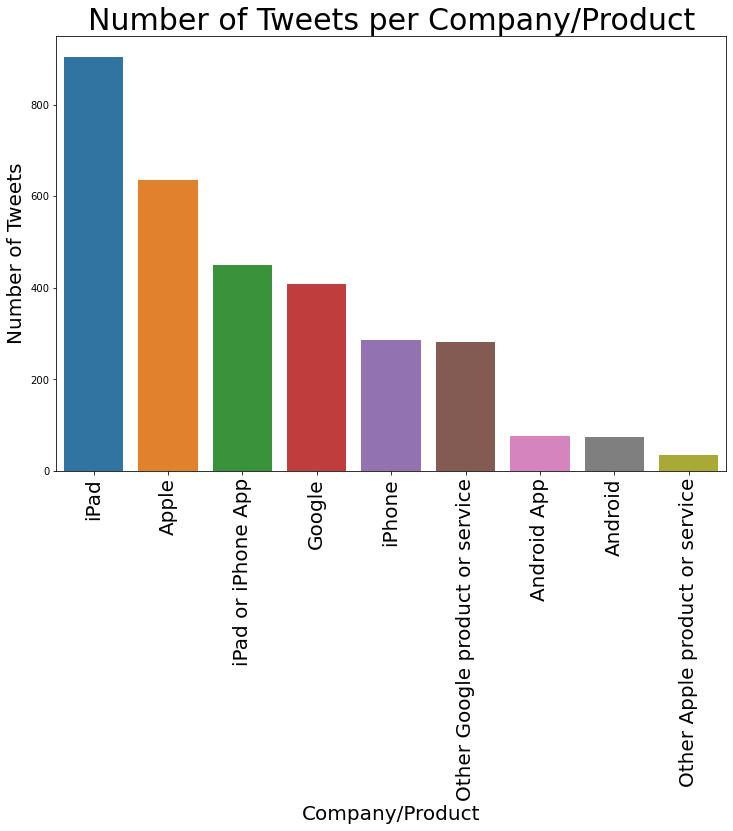

In [33]:
countplot( df_tweet, 'Company/Product')

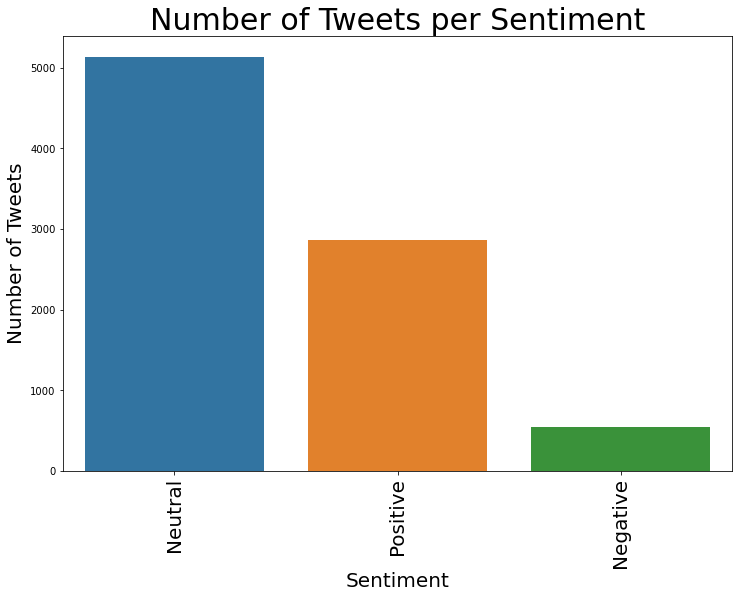

In [34]:
countplot (df_tweet, 'Sentiment')

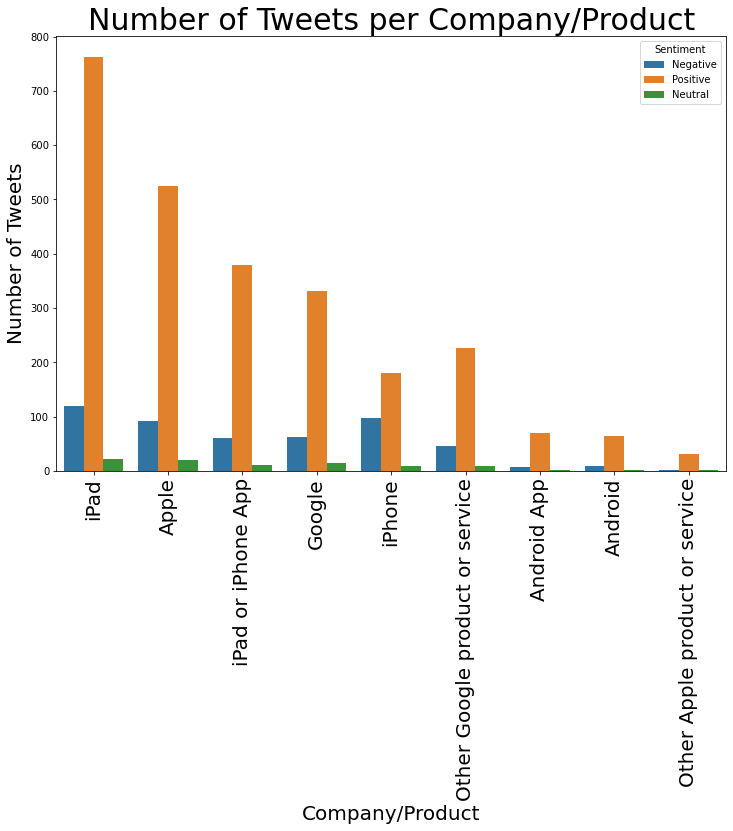

In [35]:
countplot(df_tweet, 'Company/Product', hue='Sentiment')

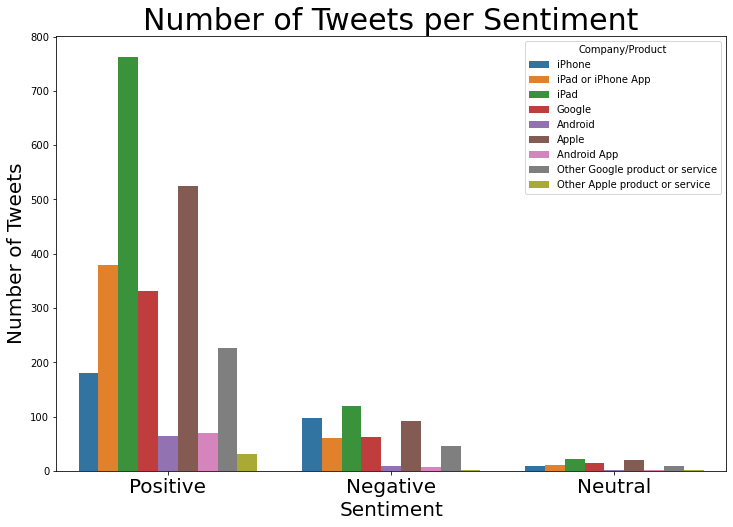

In [36]:
countplot(df_tweet, 'Sentiment', hue='Company/Product', rotation=None)


In [37]:
df_positive = df_tweet[df_tweet['Sentiment']=='Positive']
df_positive['Sentiment'].value_counts()


Positive    2861
Name: Sentiment, dtype: int64

In [38]:
pos_corpus = df_positive['Tweet'].to_list()
pos_corpus[:5]

["@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 "@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",
 '#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB']

## Tokenization

In [39]:
def tokenize_tweets(corpus, preserve_case=False, strip_handles=True):
    tokenizer = TweetTokenizer(preserve_case=preserve_case, 
                               strip_handles=strip_handles)
    tokens = tokenizer.tokenize(','.join(corpus))
    return tokens
    

In [40]:
tokens_pos = tokenize_tweets(pos_corpus)

In [41]:
#displaying 10 most common tokens
freq = FreqDist(tokens_pos)
freq.most_common(10)

[(',', 3941),
 ('#sxsw', 2874),
 ('.', 2175),
 ('the', 1551),
 ('!', 1197),
 ('link', 1167),
 ('{', 1164),
 ('}', 1164),
 ('to', 1119),
 ('at', 999)]

## Lemmatizaton

In [42]:
def process_tokens(tokens):
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove punctuation
    lemmatized_tokens_no_punct = [token for token in lemmatized_tokens if token not in string.punctuation]
    
    # Remove English stop words
    stop_words = set(stopwords.words('english'))
    processed_tokens = [token for token in lemmatized_tokens_no_punct if token not in stop_words]
    
    return processed_tokens

In [43]:
tokens_pos_lemm = process_tokens(tokens_pos)

In [44]:
freq = FreqDist(tokens_pos_lemm)
freq.most_common(50)

[('#sxsw', 2874),
 ('link', 1170),
 ('ipad', 984),
 ('rt', 927),
 ('apple', 700),
 ('google', 585),
 ('2', 580),
 ('store', 535),
 ('�', 453),
 ('iphone', 450),
 ('app', 373),
 ('new', 352),
 ('austin', 243),
 ('...', 215),
 ('get', 174),
 ('launch', 166),
 ('#apple', 157),
 ('android', 152),
 ('party', 149),
 ('pop-up', 146),
 ('sxsw', 142),
 ('line', 138),
 ('time', 131),
 ('great', 128),
 ('day', 123),
 ('via', 122),
 ('social', 120),
 ('win', 118),
 ('#ipad2', 118),
 ('free', 116),
 ('cool', 116),
 ("i'm", 114),
 ('like', 110),
 ('map', 109),
 ('today', 109),
 ('one', 109),
 ('circle', 106),
 ('ha', 103),
 ('go', 103),
 ('come', 101),
 ('w', 99),
 ('wa', 97),
 ('#sxswi', 94),
 ('love', 91),
 ('network', 91),
 ('awesome', 90),
 ('good', 88),
 ('mobile', 87),
 ('opening', 86),
 ('downtown', 85)]

In [45]:
def updated_process_tokens(tokens):
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove punctuation
    lemmatized_tokens_no_punct = [token for token in lemmatized_tokens if token not in string.punctuation]
    
    # Remove English stop words
    stop_words = set(stopwords.words('english'))
    additional_stop_words = ['#sxsw', 'sxsw', '#sxswi', 'link', 'rt']
    stop_words.update(additional_stop_words)
    processed_tokens_updated = [token for token in lemmatized_tokens_no_punct if token not in stop_words]
    
    return processed_tokens_updated

In [46]:
update_tokens_pos_lemm = updated_process_tokens(tokens_pos)

In [47]:
def most_frequent_tokens(tokens, n=50):
    # Calculate the frequency distribution of the tokens
    freq_dist = nltk.FreqDist(tokens)
    
    # Return the n most common tokens
    return freq_dist.most_common(n)

In [48]:
most_frequent_tokens(update_tokens_pos_lemm)

[('ipad', 984),
 ('apple', 700),
 ('google', 585),
 ('2', 580),
 ('store', 535),
 ('�', 453),
 ('iphone', 450),
 ('app', 373),
 ('new', 352),
 ('austin', 243),
 ('...', 215),
 ('get', 174),
 ('launch', 166),
 ('#apple', 157),
 ('android', 152),
 ('party', 149),
 ('pop-up', 146),
 ('line', 138),
 ('time', 131),
 ('great', 128),
 ('day', 123),
 ('via', 122),
 ('social', 120),
 ('win', 118),
 ('#ipad2', 118),
 ('free', 116),
 ('cool', 116),
 ("i'm", 114),
 ('like', 110),
 ('map', 109),
 ('today', 109),
 ('one', 109),
 ('circle', 106),
 ('ha', 103),
 ('go', 103),
 ('come', 101),
 ('w', 99),
 ('wa', 97),
 ('love', 91),
 ('network', 91),
 ('awesome', 90),
 ('good', 88),
 ('mobile', 87),
 ('opening', 86),
 ('downtown', 85),
 ('temporary', 84),
 ('#ipad', 83),
 ('people', 82),
 ('#iphone', 79),
 ('got', 79)]

In [49]:
#defining a function for wordcloud generation
def create_wordcloud(tokens_list, colormap= 'Greens', title='title'):
    mask = np.array(Image.open('images/twitter_logo_2.png'))
    # Join the tokens into a single string
    text = ' '.join(tokens_list)
    
    # Generate a word cloud image
    wordcloud = WordCloud(width=500, height=300, background_color='black', mask=mask, colormap=colormap).generate(text)
    
    # Display the generated image:
    plt.figure(figsize=(12, 15), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

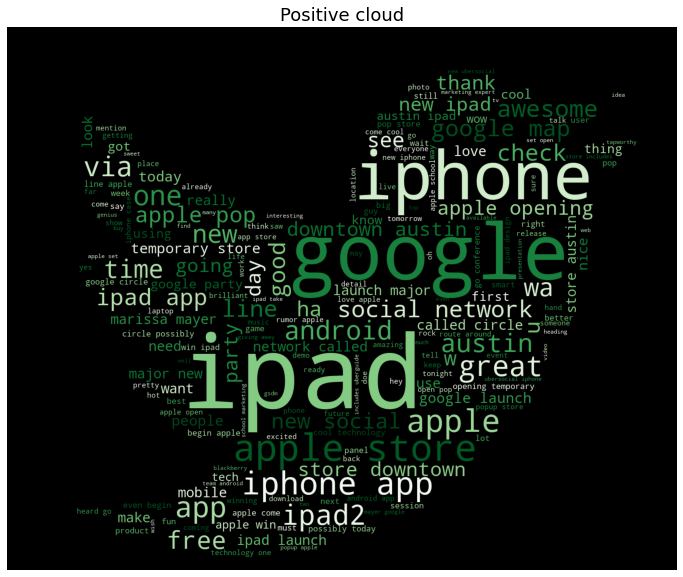

In [50]:
cloud_pos= create_wordcloud(update_tokens_pos_lemm, title = 'Positive cloud')

In [51]:
def second_updated_process_tokens(tokens):
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove punctuation
    lemmatized_tokens_no_punct = [token for token in lemmatized_tokens if token not in string.punctuation]
    
    # Remove English stop words
    stop_words = set(stopwords.words('english'))
    additional_stop_words = ['#sxsw', 'sxsw', '#sxswi', 'link', 'rt', 'ipad', 'apple', 'google', 'iphone', '#apple', '#google', '#ipad', '#iphone', 'android','ipad2']
    stop_words.update(additional_stop_words)
    processed_tokens_updated_second = [token for token in lemmatized_tokens_no_punct if token not in stop_words]
    
    return processed_tokens_updated_second

In [52]:
second_update_tokens_pos_lemm = second_updated_process_tokens(tokens_pos)

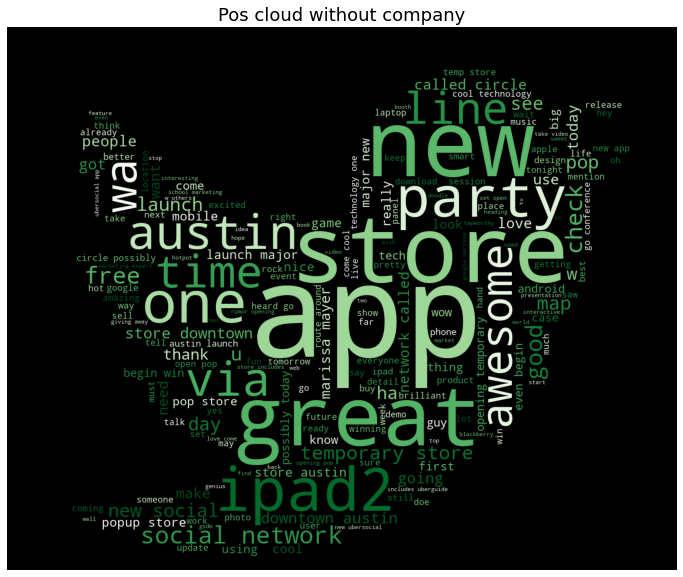

In [53]:
cloud_pos_wo_company= create_wordcloud(second_update_tokens_pos_lemm, title= 'Pos cloud without company')


### Negative Sentiment Tweets

In [54]:
df_neg = df_tweet[df_tweet['Sentiment']=='Negative']
df_neg['Sentiment'].value_counts()

Negative    544
Name: Sentiment, dtype: int64

In [55]:
neg_corpus= df_neg['Tweet'].to_list()
neg_corpus

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 'I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone',
 '@mention  - False Alarm: Google Circles Not Coming Now���and Probably Not Ever? - {link} #Google #Circles #Social #SXSW',
 'Again? RT @mention Line at the Apple store is insane.. #sxsw',
 'attending @mention iPad design headaches #sxsw {link}',
 'Boooo! RT @mention Flipboard is developing an iPhone version, not Android, says @mention #sxsw',
 "What !?!? @mention  #SXSW does not provide iPhone chargers?!?  I've changed my mind about going next year!",
 "Know that &quot;dataviz&quot; translates to &quot;satanic&quot; on an iPhone. I'm just sayin'. #sxsw",
 'Seriously #sxsw? Did you do any testing on the mobile apps? Constant iPad crashes ca

In [56]:
neg_tokens = tokenize_tweets(neg_corpus)


In [57]:
neg_freq = FreqDist(neg_tokens)
freq.most_common(10)

[('#sxsw', 2874),
 ('link', 1170),
 ('ipad', 984),
 ('rt', 927),
 ('apple', 700),
 ('google', 585),
 ('2', 580),
 ('store', 535),
 ('�', 453),
 ('iphone', 450)]

In [58]:
tokens_neg_lemm= process_tokens(neg_tokens)

In [59]:
updated_tokens_neg_lemm= updated_process_tokens(neg_tokens)

In [60]:
most_frequent_tokens(updated_tokens_neg_lemm)

[('ipad', 176),
 ('iphone', 140),
 ('google', 132),
 ('apple', 96),
 ('2', 80),
 ('�', 74),
 ('app', 58),
 ('store', 46),
 ('like', 43),
 ('...', 41),
 ('new', 41),
 ('need', 35),
 ('circle', 29),
 ('people', 29),
 ('ha', 29),
 ('design', 27),
 ('social', 27),
 ('get', 25),
 ('wa', 24),
 ('apps', 24),
 ('austin', 23),
 ('think', 23),
 ('time', 22),
 ('launch', 21),
 ('one', 21),
 ('look', 21),
 ('line', 20),
 ('say', 20),
 ('day', 20),
 ('today', 20),
 ('android', 19),
 ('would', 19),
 ('phone', 18),
 ('network', 17),
 ('headache', 16),
 ("i've", 16),
 ("i'm", 16),
 ('#ipad', 16),
 ('long', 16),
 ('product', 16),
 ('user', 15),
 ('news', 15),
 ('thing', 15),
 ('see', 15),
 ('much', 15),
 ('company', 15),
 ('america', 15),
 ('battery', 14),
 ('money', 14),
 ('#apple', 14)]

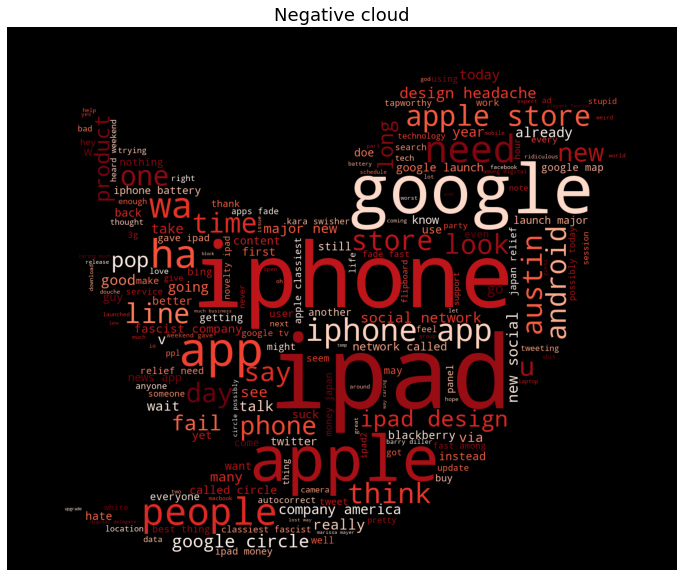

In [61]:
cloud_neg= create_wordcloud(updated_tokens_neg_lemm, colormap='Reds', title='Negative cloud')


In [62]:
second_update_tokens_neg_lemm = second_updated_process_tokens(neg_tokens)

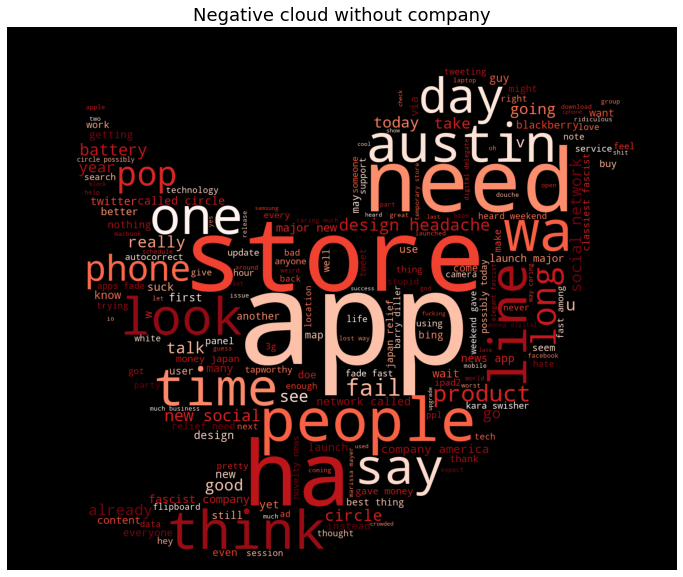

In [63]:
cloud_neg_wo_company= create_wordcloud(second_update_tokens_neg_lemm, colormap='Reds', title='Negative cloud without company')

## Feature Engineering Company Column 


In [64]:
df_tweet['Company/Product'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Unknown',
       'Android', 'Apple', 'Android App',
       'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [65]:
company_dict={'iPhone': 'Apple', 'iPad or iPhone App': 'Apple', 'iPad': 'Apple', 
            'Google': 'Google', 'Unknown': 'Unknown',
            'Android': 'Google', 'Apple': 'Apple', 'Android App': 'Google',
            'Other Google product or service': 'Google',
            'Other Apple product or service': 'Apple'}
df_tweet['Company'] = df_tweet['Company/Product'].map(company_dict)
df_tweet['Company'].unique()

array(['Apple', 'Google', 'Unknown'], dtype=object)

In [66]:
df_apple = df_tweet[df_tweet['Company']=='Apple']
corpus_apple = df_apple['Tweet'].to_list()

In [67]:
tokens_apple = tokenize_tweets(corpus_apple)

In [68]:
tokens_apple_lemm = process_tokens(tokens_apple)

In [69]:
tokens_apple_ls = updated_process_tokens(tokens_apple_lemm)

In [70]:
most_frequent_tokens(tokens_apple_ls)

[('ipad', 1086),
 ('apple', 760),
 ('2', 591),
 ('store', 548),
 ('iphone', 544),
 ('�', 344),
 ('app', 330),
 ('austin', 228),
 ('new', 222),
 ('...', 187),
 ('#apple', 159),
 ('pop-up', 151),
 ('get', 147),
 ('line', 143),
 ('#ipad2', 113),
 ('like', 110),
 ('one', 109),
 ("i'm", 107),
 ('ha', 102),
 ('win', 100),
 ('go', 99),
 ('#ipad', 96),
 ('via', 96),
 ('cool', 94),
 ('day', 93),
 ('wa', 90),
 ('time', 87),
 ('opening', 84),
 ('temporary', 84),
 ('downtown', 82),
 ('come', 78),
 ('apps', 78),
 ('launch', 77),
 ('free', 76),
 ('love', 76),
 ('great', 75),
 ('#iphone', 73),
 ('even', 72),
 ('open', 71),
 ('need', 69),
 ('awesome', 69),
 ('popup', 67),
 ('people', 65),
 ('good', 63),
 ('got', 63),
 ('want', 60),
 ('going', 59),
 ('first', 58),
 ('u', 58),
 ('pop', 57)]

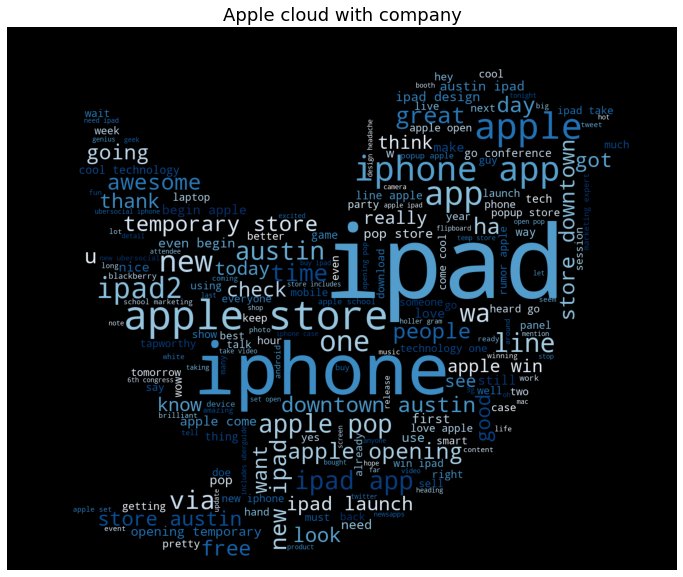

In [71]:
apple_cloud_w_company=create_wordcloud(tokens_apple_ls, colormap='Blues', title='Apple cloud with company')


In [72]:
second_tokens_apple_ls = second_updated_process_tokens(tokens_apple_lemm)

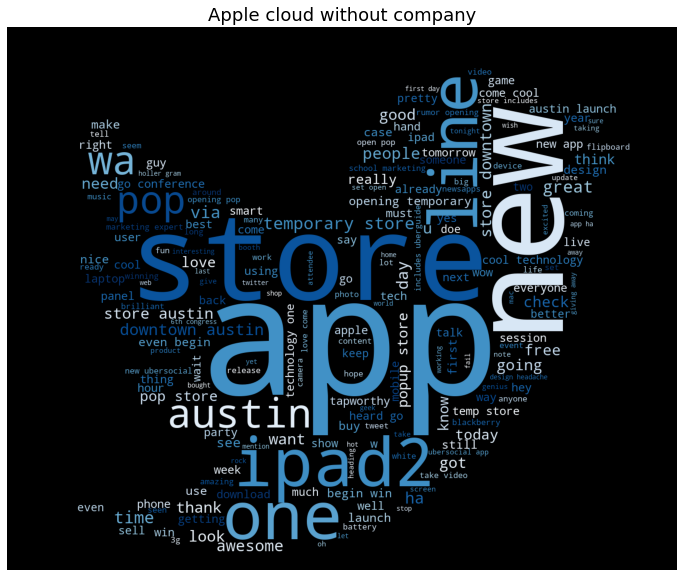

In [73]:
apple_cloud_wo_company = create_wordcloud(second_tokens_apple_ls, colormap='Blues', title= 'Apple cloud without company')

In [74]:
df_apple_sentiment = pd.DataFrame(df_apple['Sentiment'].value_counts(normalize=True)).reset_index()
df_apple_sentiment.columns=['Sentiment', 'Percentage']
display(df_apple_sentiment)
df_apple_sentiment.sort_values('Percentage', ascending=True, inplace=True)

Sentiment  Percentage
0  Positive    0.812635
1  Negative    0.160537
2   Neutral    0.026828

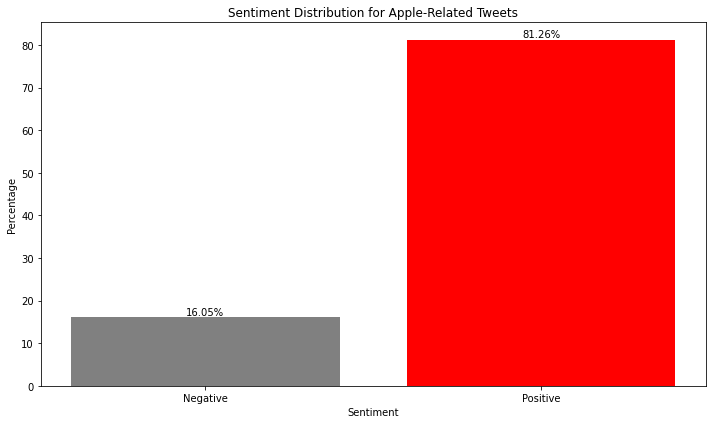

In [259]:
categories = [ 'Negative', 'Positive']
percentages = [16.05, 81.26]

# Creating bar plot
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(categories, percentages, color=['grey', 'red', 'blue', 'green'])

# Adding title and labels
plt.title('Sentiment Distribution for Apple-Related Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

# Adding percentage labels above bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f'{percentage}%', ha='center')

# Show plot
plt.tight_layout()
plt.show()

In [76]:
def generate_product_wordcloud(company, sentiment, colormap='Greens', title= 'title'):
    company_df = df_tweet[df_tweet['Company']==company]
    final_df = company_df[company_df['Sentiment']==sentiment]
    product_lst = list(final_df['Company/Product'].unique())
    wordclouds={}
    for product in product_lst:
            token_df = final_df[final_df['Company/Product']==product]
            corpus = token_df['Tweet'].to_list()
            #tokenize tweets
            tokens_company = tokenize_tweets(corpus)
            #lemmatize tweets
            tokens_company_lemm = process_tokens(tokens_company)
            #remove stop words & punctuation using the same stop words list
            tokens_company_ls = second_updated_process_tokens(tokens_company_lemm) 
            wordclouds[product] = create_wordcloud(tokens_company_ls, 
                                     colormap=colormap, title=title)
            
    return wordclouds

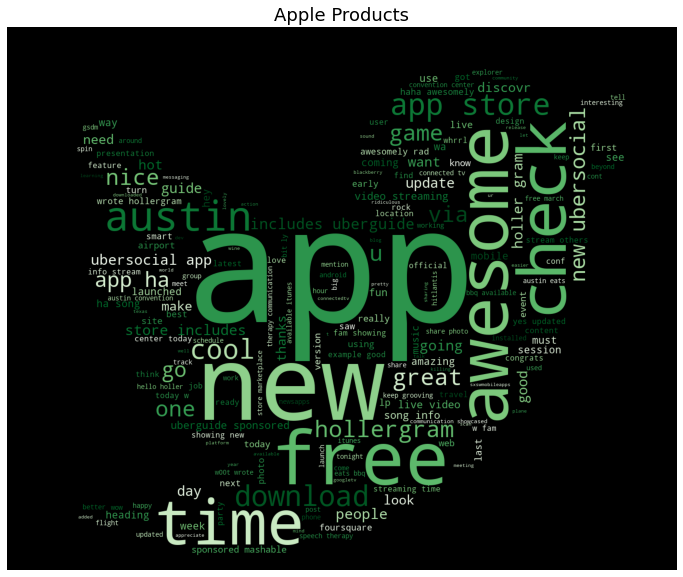

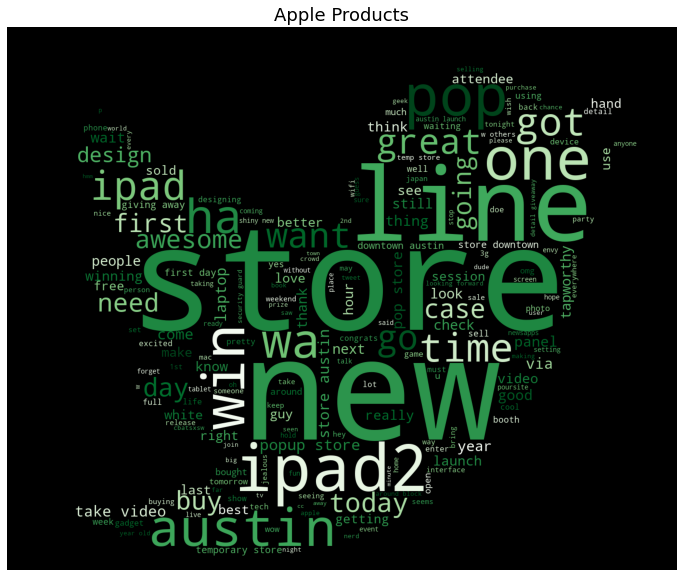

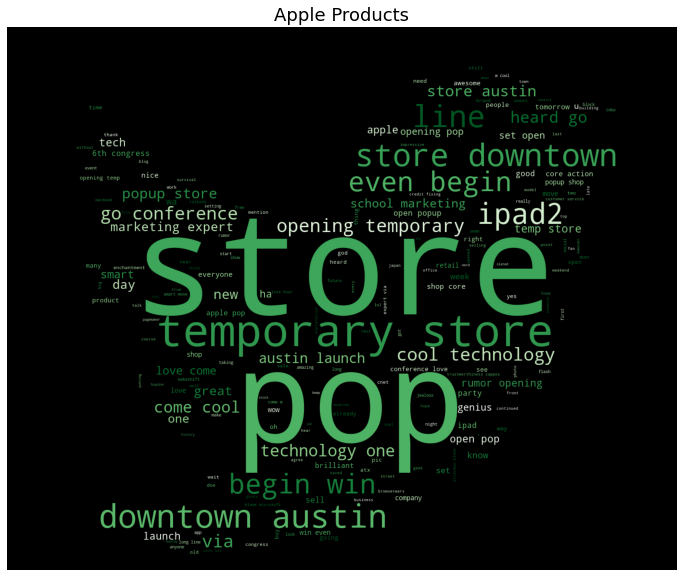

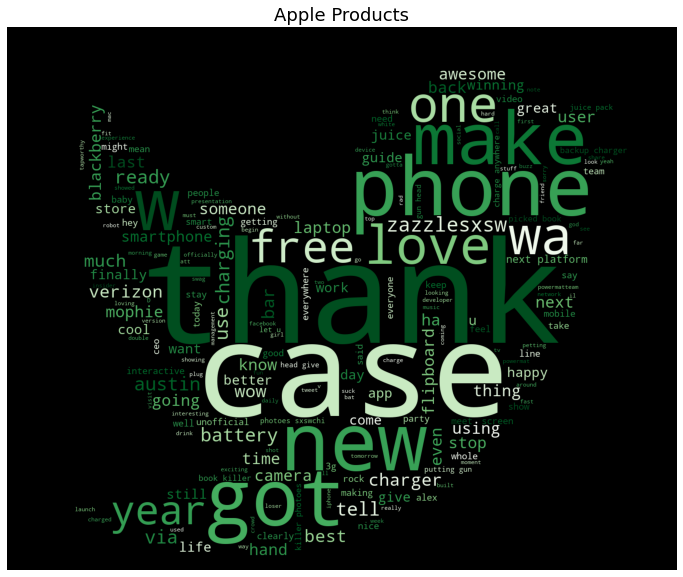

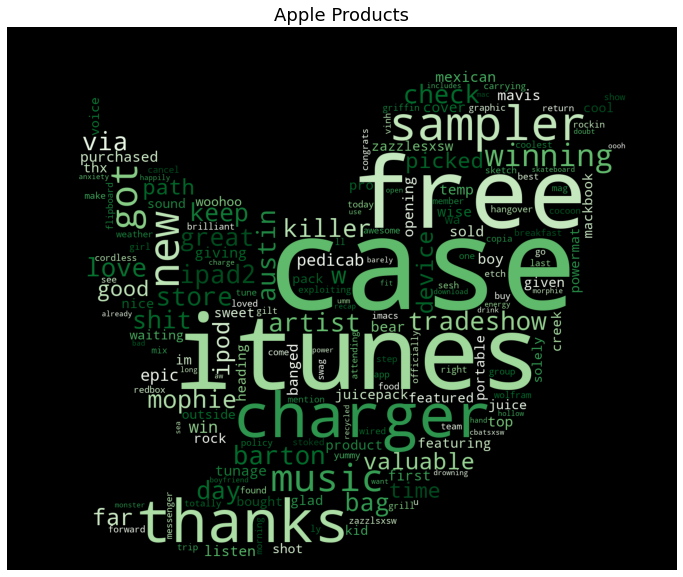

In [77]:
wordcloud_apple_pos = generate_product_wordcloud('Apple', 'Positive', title="Apple Products") 
                                                                
                                                                

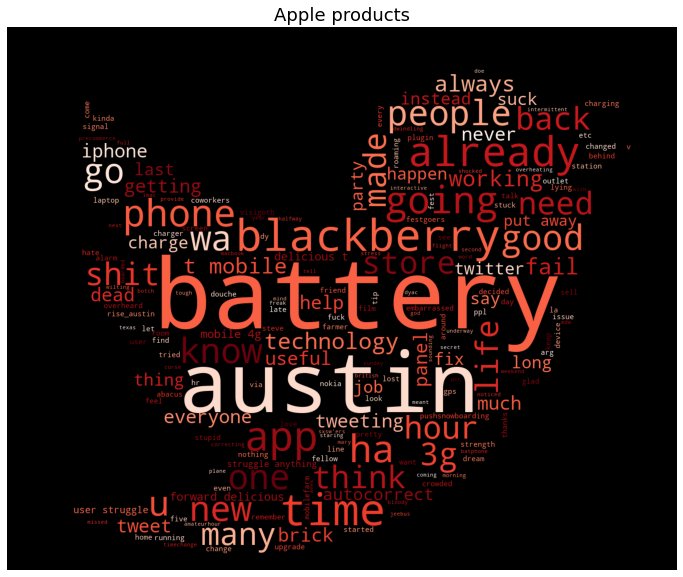

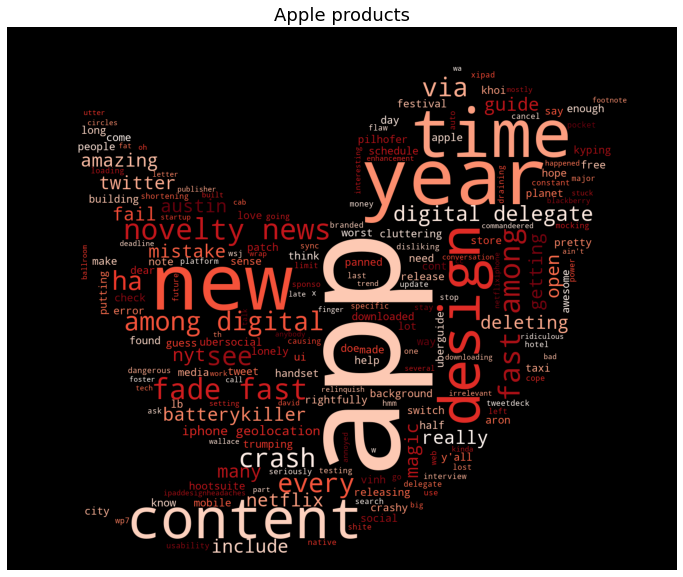

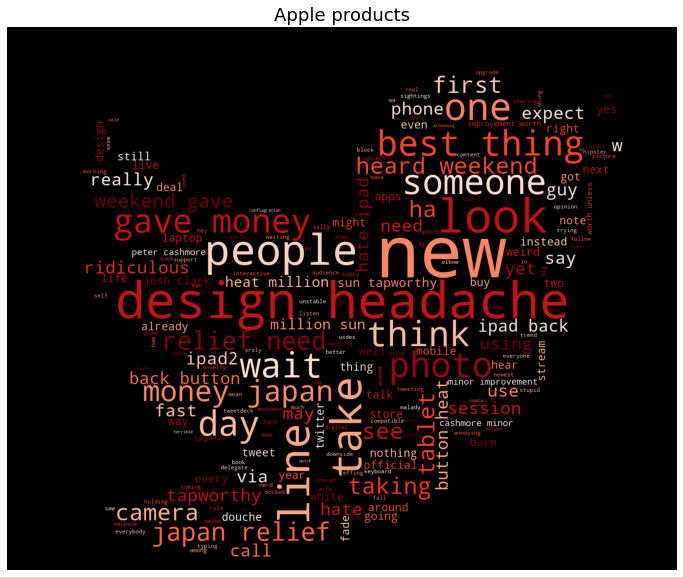

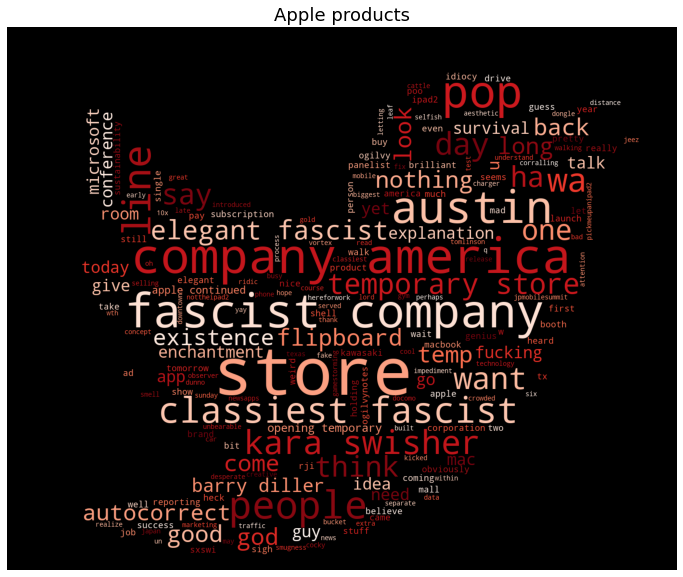

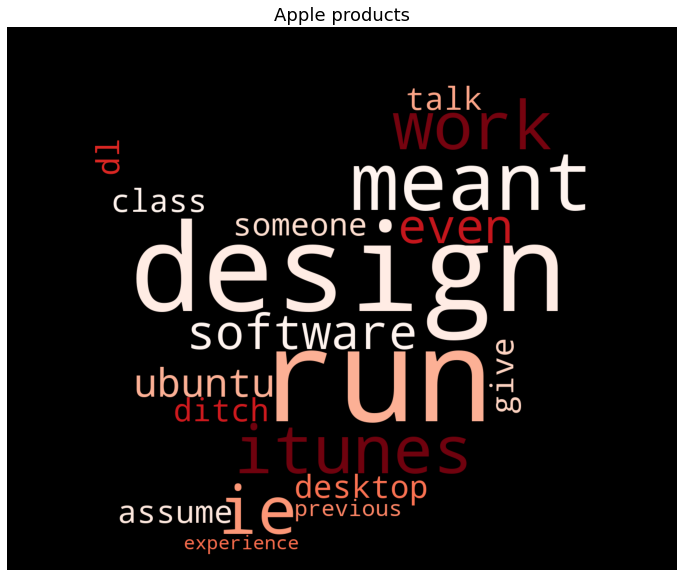

In [78]:
wordcloud_apple_neg = generate_product_wordcloud('Apple','Negative',colormap='Reds', title='Apple products')


In [79]:
df_google = df_tweet[df_tweet['Company']=='Google']
corpus_google = df_google['Tweet'].to_list()

In [80]:
tokens_google = tokenize_tweets(corpus_google)
#lemmatize tweets
tokens_google_lemm = process_tokens(tokens_google)
#remove stop words & punctuation using the same stop words list
tokens_google_ls = updated_process_tokens(tokens_google_lemm)

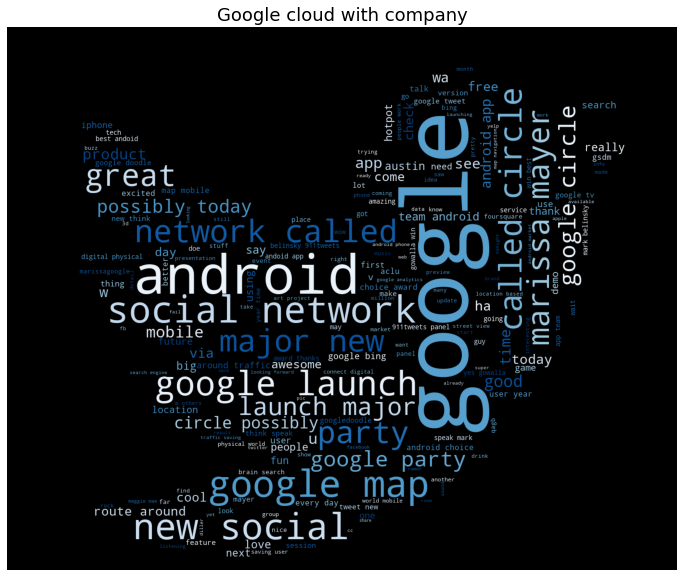

In [81]:
google_cloud_w_company=create_wordcloud(tokens_google_ls, colormap='Blues', title= 'Google cloud with company')

In [82]:
second_tokens_google_ls = second_updated_process_tokens(tokens_google_lemm)

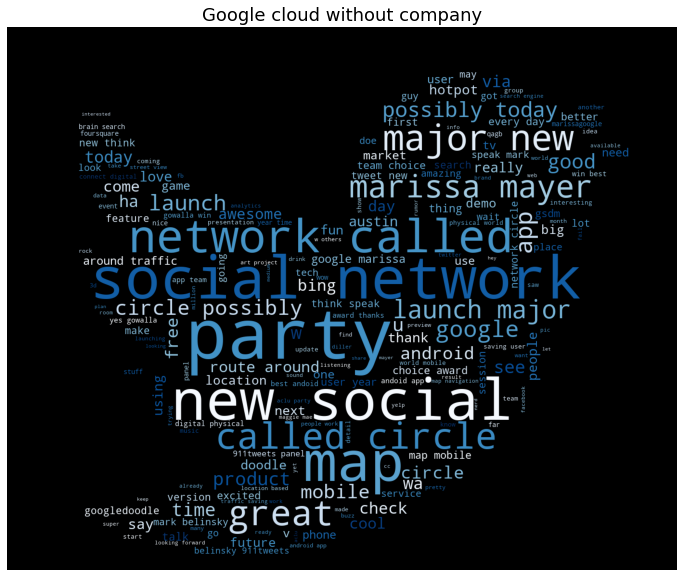

In [83]:
google_cloud_wo_company = create_wordcloud(second_tokens_google_ls, colormap='Blues', title= 'Google cloud without company')

In [84]:
df_google_sentiment = pd.DataFrame(df_google['Sentiment'].value_counts(normalize=True)).reset_index()
df_google_sentiment.columns=['Sentiment', 'Percentage']
display(df_google_sentiment)
df_google_sentiment.sort_values('Percentage', ascending=True, inplace=True)

Sentiment  Percentage
0  Positive    0.822619
1  Negative    0.147619
2   Neutral    0.029762

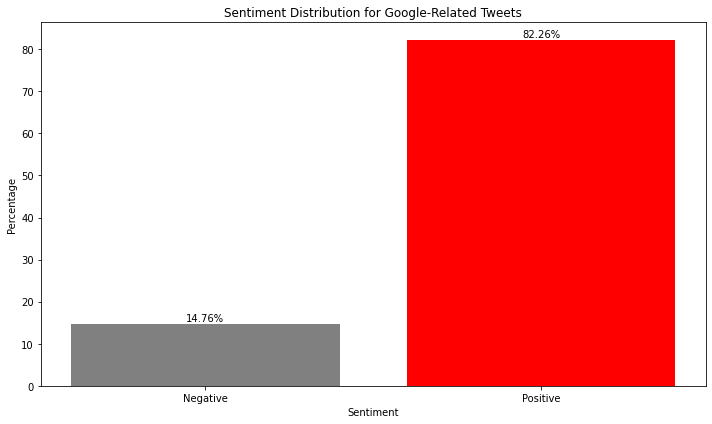

In [258]:
categories = [ 'Negative', 'Positive']
percentages = [ 14.76, 82.26]


plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(categories, percentages, color=['grey', 'red', 'blue', 'green'])


plt.title('Sentiment Distribution for Google-Related Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')


for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f'{percentage}%', ha='center')

# Show plot
plt.tight_layout()
plt.show()

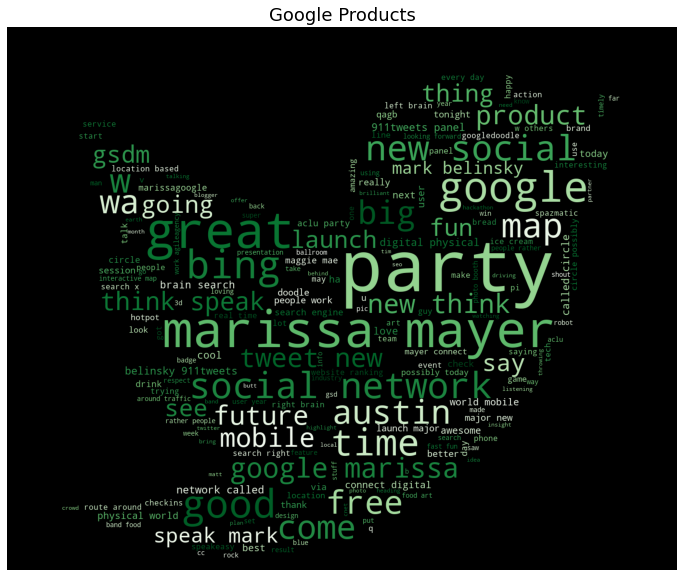

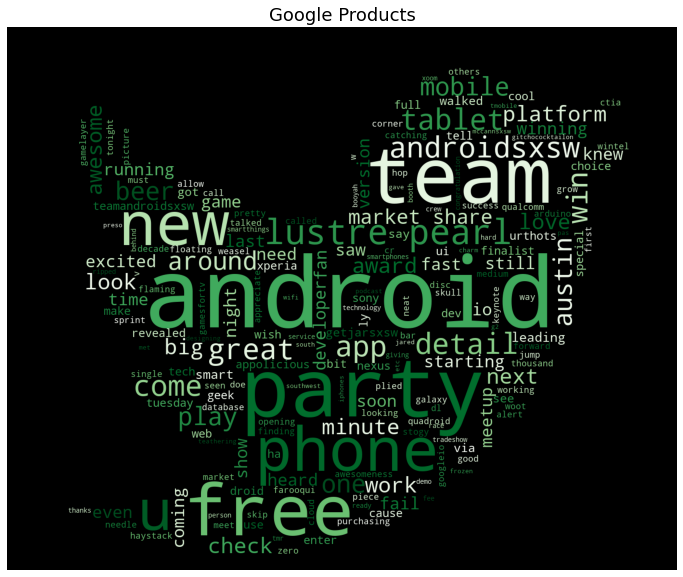

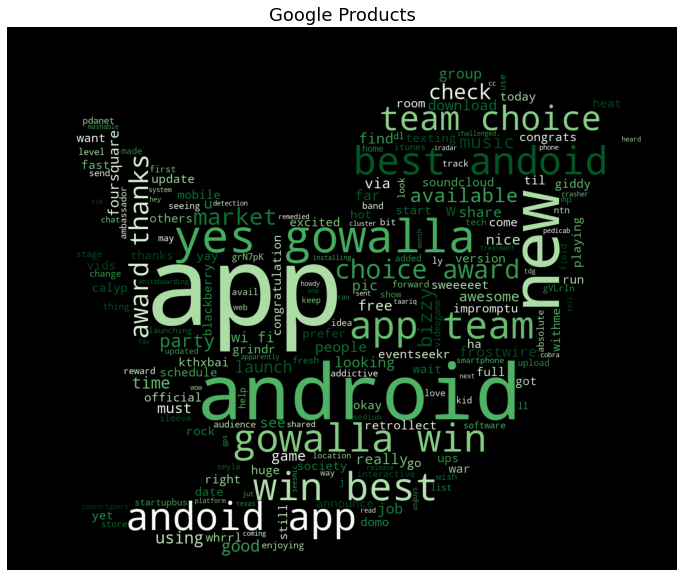

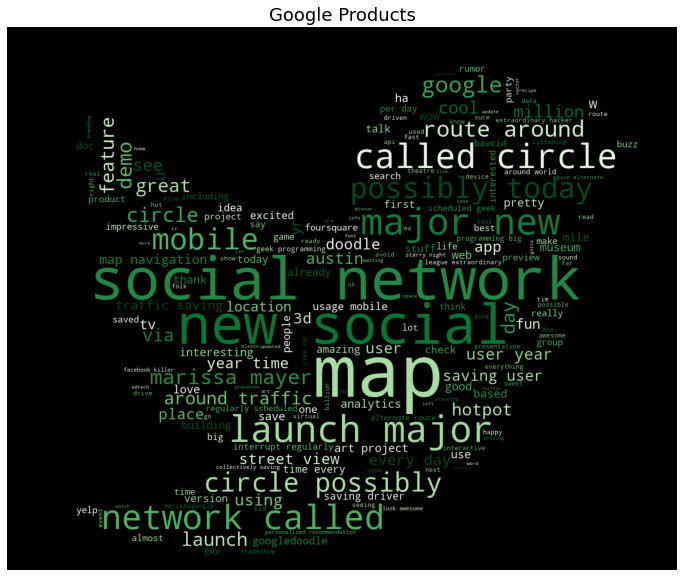

In [86]:
wordcloud_google_pos = generate_product_wordcloud('Google', 'Positive', title= 'Google Products') 
                                                                  

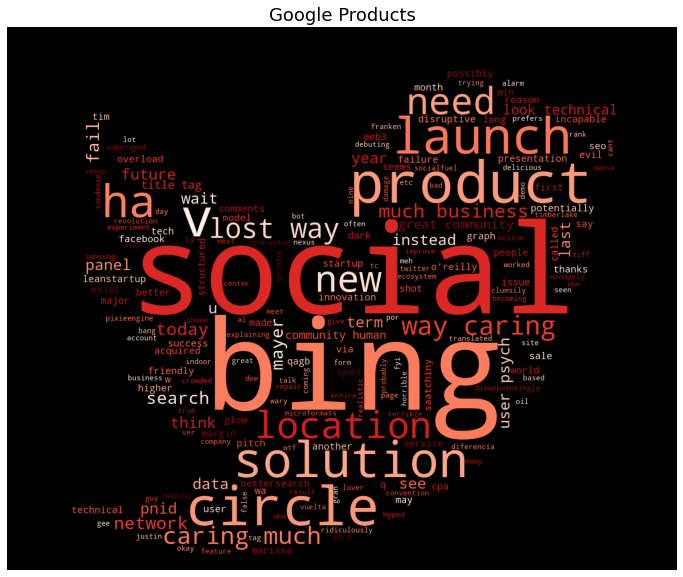

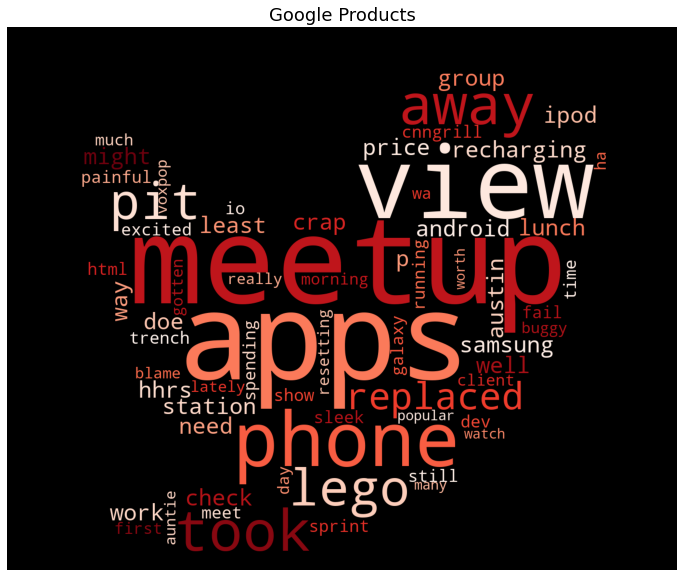

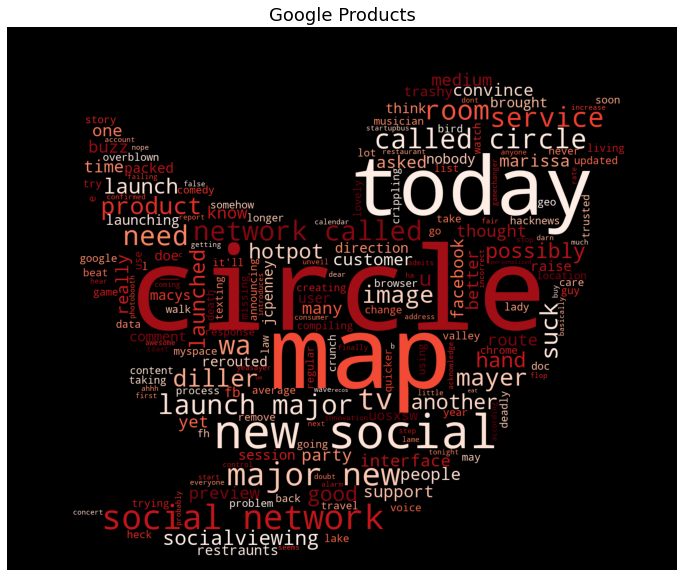

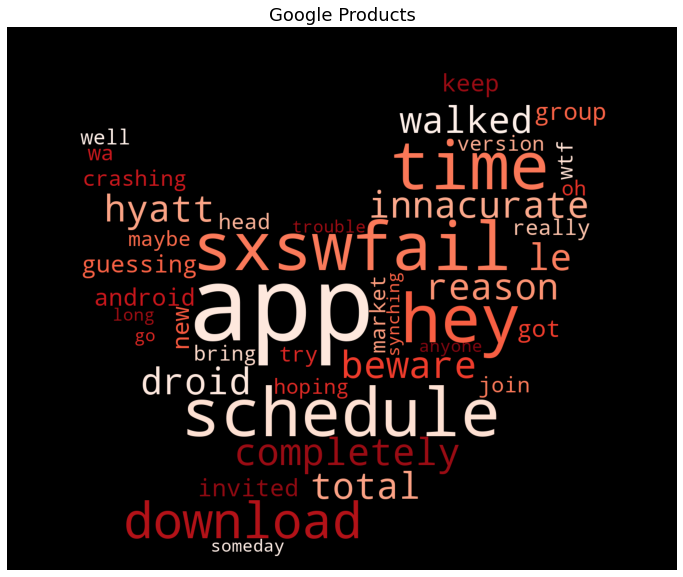

In [87]:
wordcloud_google_neg = generate_product_wordcloud('Google', 'Negative',colormap='Reds', title='Google Products')

## Modeling

In [149]:
from nltk.corpus import stopwords

# Define the set of English stop words
stop_words = set(stopwords.words('english'))

# Define additional stop words specific to the context
additional_stop_words = ['#sxsw', 'sxsw', '#sxswi', 'link', 'rt', 'ipad', 'apple', 'google', 'iphone', '#apple', '#google', '#ipad', '#iphone', 'android']

# Update the original set of stop words with the additional ones
stop_lst=stop_words.update(additional_stop_words)

In [150]:
#removing neutral tweets for binary classification
data = df_tweet[df_tweet['Sentiment']!='Neutral']
#verifying that neutral tweets have been removed
data['Sentiment'].unique()

array(['Negative', 'Positive'], dtype=object)

In [151]:
sentiment_dict = {'Negative': 0, 'Positive': 1}
data['Sentiment'] = data['Sentiment'].map(sentiment_dict)

In [152]:
X=data['Tweet']
y=data['Sentiment']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)


In [183]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True)


In [184]:
vectorizer= TfidfVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_lst)
vec_X_train = vectorizer.fit_transform(X_train)
vec_X_test  = vectorizer.transform(X_test)

In [185]:
len(y_train)

2724

In [186]:
count = np.bincount(y_train)
print(count[0]) # Minority class
print(count[1]) # Majority class

446
2278


In [187]:
# Automatically assign the weights for each class from the training data

# We must give the minority class the higher weight, to balance the scale against the number of occurences
# We do this by calculating the percentages of each class in the data 

w0 = count[1]/len(y_train) # Assigning majority percentage
w1 = count[0]/len(y_train) # Assigning minority percentage

print(w0) # Adjusted weight for the minority class
print(w1) # Adjusted weight for the majority class

0.8362701908957415
0.16372980910425844


In [188]:
# Previous original class distribution
print(y_train.value_counts()) 

# Fit SMOTE to training data
vec_X_train_resampled, y_train_resampled = SMOTE().fit_resample(vec_X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

1    2278
0     446
Name: Sentiment, dtype: int64


1    2278
0    2278
Name: Sentiment, dtype: int64


In [191]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

metrics_df = []

def get_classification_report(y_test, y_pred):
    from sklearn.metrics import classification_report
    
    report = classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    
    # Reindexing or changing the order of rows
    df_classification_report = df_classification_report.reindex(['0', '1', 'accuracy', 'weighted avg', 'macro avg'])
    
    # Capitalizing column names
    df_classification_report.columns = df_classification_report.columns.str.capitalize()

    metrics_df.append(df_classification_report.iloc[1:2, :])
    return df_classification_report

def model_results(model, X_train, X_test, y_train, y_test):
    preds = model.predict(X_test)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, preds)
    total = np.sum(conf_matrix)
    conf_matrix_percent = conf_matrix / total
    
    # Plotting Confusion Matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix_percent, cmap='Blues', interpolation='nearest')
    plt.title('Confusion Matrix (Percentage)')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
    plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    for i in range(2):
        for j in range(2):
            plt.text(j, i, format(conf_matrix_percent[i, j], '.2f'), horizontalalignment='center', color='white' if conf_matrix_percent[i, j] > 0.5 else 'black')
    plt.show()
    
    # Mean Absolute Error & Root Mean Squared Error
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print('Mean Absolute Error:', mae) 
    print('Root Mean Squared Error:', rmse)
    
    # Training and Testing Scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('Training Score:', train_score)
    print('Testing Score:', test_score)
    
    # Plotting ROC Curve
    plot_roc_curve(model, X_test, y_test)
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    # Classification Report
    classification_rep = get_classification_report(y_test, preds)
    print(classification_rep)

    return mae, rmse, train_score, test_score, classification_rep

### Bernoulli Model

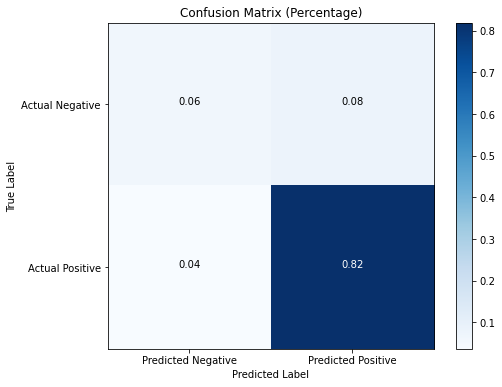

Mean Absolute Error: 0.11894273127753303
Root Mean Squared Error: 0.3448807493577063
Training Score: 0.9657594381035997
Testing Score: 0.8810572687224669


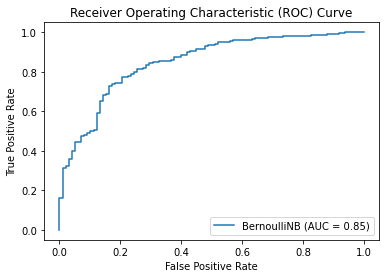

              Precision    Recall  F1-score     Support
0              0.626866  0.428571  0.509091   98.000000
1              0.908795  0.957118  0.932331  583.000000
accuracy       0.881057  0.881057  0.881057    0.881057
weighted avg   0.868223  0.881057  0.871424  681.000000
macro avg      0.767830  0.692845  0.720711  681.000000
Mean Absolute Error: 0.11894273127753303
Root Mean Squared Error: 0.3448807493577063
Training Score: 0.9657594381035997
Testing Score: 0.8810572687224669
              Precision    Recall  F1-score     Support
0              0.626866  0.428571  0.509091   98.000000
1              0.908795  0.957118  0.932331  583.000000
accuracy       0.881057  0.881057  0.881057    0.881057
weighted avg   0.868223  0.881057  0.871424  681.000000
macro avg      0.767830  0.692845  0.720711  681.000000


In [193]:
from sklearn.naive_bayes import BernoulliNB

# Create and train Bernoulli Naive Bayes model
BNBmodel = BernoulliNB()
BNBmodel.fit(vec_X_train_resampled, y_train_resampled)

# Display results of the model
mae, rmse, train_score, test_score, classification_rep = model_results(BNBmodel, vec_X_train_resampled, vec_X_test, y_train_resampled, y_test)
print('Mean Absolute Error:', mae) 
print('Root Mean Squared Error:', rmse)
print('Training Score:', train_score)
print('Testing Score:', test_score)

# Return Classification Report
print(classification_rep)

### Bernoulli tuned model

Best Hyperparameters:
{'alpha': 0.1}


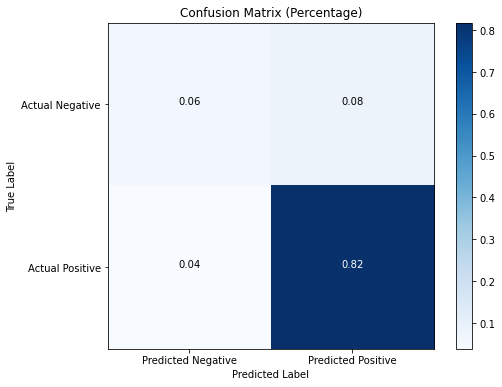

Mean Absolute Error: 0.12041116005873716
Root Mean Squared Error: 0.3470031124626077
Training Score: 0.9800263388937664
Testing Score: 0.8795888399412628


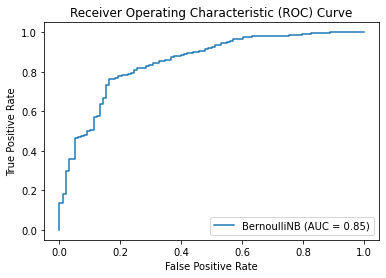

              Precision    Recall  F1-score     Support
0              0.617647  0.428571  0.506024   98.000000
1              0.908646  0.955403  0.931438  583.000000
accuracy       0.879589  0.879589  0.879589    0.879589
weighted avg   0.866770  0.879589  0.870218  681.000000
macro avg      0.763147  0.691987  0.718731  681.000000
Mean Absolute Error: 0.12041116005873716
Root Mean Squared Error: 0.3470031124626077
Training Score: 0.9800263388937664
Testing Score: 0.8795888399412628
              Precision    Recall  F1-score     Support
0              0.617647  0.428571  0.506024   98.000000
1              0.908646  0.955403  0.931438  583.000000
accuracy       0.879589  0.879589  0.879589    0.879589
weighted avg   0.866770  0.879589  0.870218  681.000000
macro avg      0.763147  0.691987  0.718731  681.000000


In [248]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Create Bernoulli Naive Bayes model
BNBmodel = BernoulliNB()

# Perform grid search cross-validation
grid_search = GridSearchCV(BNBmodel, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(vec_X_train_resampled, y_train_resampled)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Display best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Display results of the best model
mae, rmse, train_score, test_score, classification_rep = model_results(best_model, vec_X_train_resampled, vec_X_test, y_train_resampled, y_test)
print('Mean Absolute Error:', mae) 
print('Root Mean Squared Error:', rmse)
print('Training Score:', train_score)
print('Testing Score:', test_score)

# Return Classification Report
print(classification_rep)



### SVC Linear Model

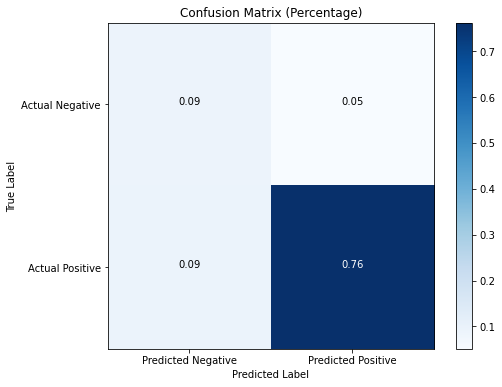

Mean Absolute Error: 0.14537444933920704
Root Mean Squared Error: 0.38128001434537195
Training Score: 0.959618208516887
Testing Score: 0.8546255506607929


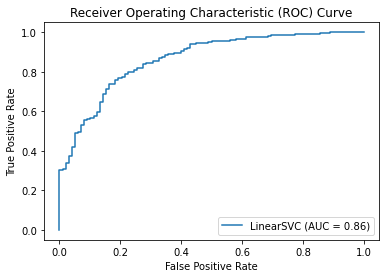

              Precision    Recall  F1-score     Support
0              0.496063  0.642857  0.560000   98.000000
1              0.936823  0.890223  0.912929  583.000000
accuracy       0.854626  0.854626  0.854626    0.854626
weighted avg   0.873395  0.854626  0.862140  681.000000
macro avg      0.716443  0.766540  0.736464  681.000000
Mean Absolute Error: 0.14537444933920704
Root Mean Squared Error: 0.38128001434537195
Training Score: 0.959618208516887
Testing Score: 0.8546255506607929
              Precision    Recall  F1-score     Support
0              0.496063  0.642857  0.560000   98.000000
1              0.936823  0.890223  0.912929  583.000000
accuracy       0.854626  0.854626  0.854626    0.854626
weighted avg   0.873395  0.854626  0.862140  681.000000
macro avg      0.716443  0.766540  0.736464  681.000000


In [195]:
from sklearn.svm import LinearSVC

# Create and train LinearSVC model
SVCmodel = LinearSVC(class_weight={0: w0, 1: w1})
SVCmodel.fit(vec_X_train, y_train)

# Display results of the model
mae, rmse, train_score, test_score, classification_rep = model_results(SVCmodel, vec_X_train, vec_X_test, y_train, y_test)
print('Mean Absolute Error:', mae) 
print('Root Mean Squared Error:', rmse)
print('Training Score:', train_score)
print('Testing Score:', test_score)

# Return Classification Report
print(classification_rep)

### SVC Linear Tuned Model

Best Hyperparameters:
{'C': 0.01, 'penalty': 'l2'}


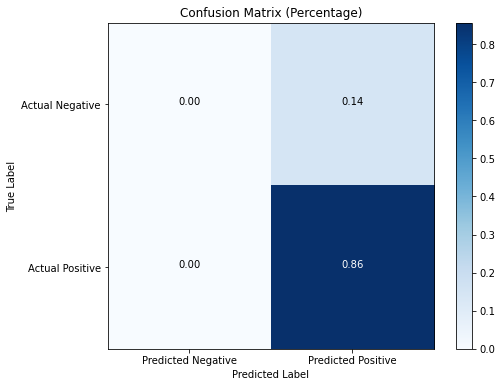

Mean Absolute Error: 0.14390602055800295
Root Mean Squared Error: 0.3793494702223834
Training Score: 0.8362701908957415
Testing Score: 0.856093979441997


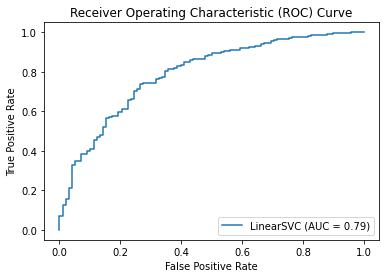

              Precision    Recall  F1-score     Support
0              0.000000  0.000000  0.000000   98.000000
1              0.856094  1.000000  0.922468  583.000000
accuracy       0.856094  0.856094  0.856094    0.856094
weighted avg   0.732897  0.856094  0.789720  681.000000
macro avg      0.428047  0.500000  0.461234  681.000000
Mean Absolute Error: 0.14390602055800295
Root Mean Squared Error: 0.3793494702223834
Training Score: 0.8362701908957415
Testing Score: 0.856093979441997
              Precision    Recall  F1-score     Support
0              0.000000  0.000000  0.000000   98.000000
1              0.856094  1.000000  0.922468  583.000000
accuracy       0.856094  0.856094  0.856094    0.856094
weighted avg   0.732897  0.856094  0.789720  681.000000
macro avg      0.428047  0.500000  0.461234  681.000000


In [261]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.01],  # Regularization parameter
    'penalty': ['l1','l2'],  # Regularization penalty
    #'class_weight': [{0: w0, 1: w1}, 'balanced']  # Class weights
}

# Create LinearSVC model
SVCmodel = LinearSVC()

# Perform grid search cross-validation
grid_search = GridSearchCV(SVCmodel, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(vec_X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Display best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Display results of the best model
mae, rmse, train_score, test_score, classification_rep = model_results(best_model, vec_X_train, vec_X_test, y_train, y_test)
print('Mean Absolute Error:', mae) 
print('Root Mean Squared Error:', rmse)
print('Training Score:', train_score)
print('Testing Score:', test_score)

# Return Classification Report
print(classification_rep)

### Logistic Regression Model

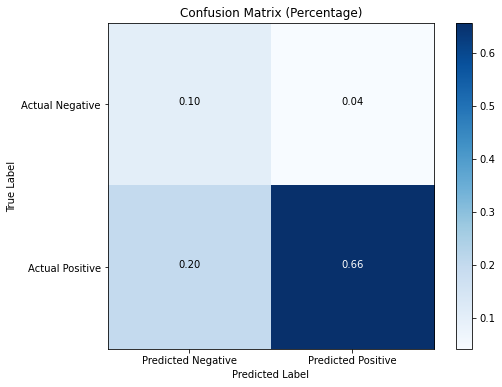

Mean Absolute Error: 0.24082232011747431
Root Mean Squared Error: 0.49073650783029615
Training Score: 0.8318649045521292
Testing Score: 0.7591776798825257


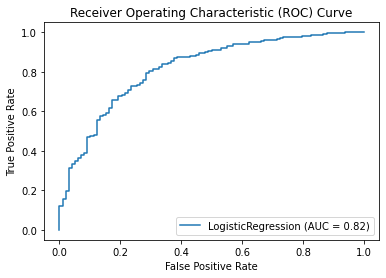

              Precision    Recall  F1-score     Support
0              0.339806  0.714286  0.460526   98.000000
1              0.941053  0.766724  0.844991  583.000000
accuracy       0.759178  0.759178  0.759178    0.759178
weighted avg   0.854530  0.759178  0.789664  681.000000
macro avg      0.640429  0.740505  0.652758  681.000000
Mean Absolute Error: 0.24082232011747431
Root Mean Squared Error: 0.49073650783029615
Training Score: 0.8318649045521292
Testing Score: 0.7591776798825257
              Precision    Recall  F1-score     Support
0              0.339806  0.714286  0.460526   98.000000
1              0.941053  0.766724  0.844991  583.000000
accuracy       0.759178  0.759178  0.759178    0.759178
weighted avg   0.854530  0.759178  0.789664  681.000000
macro avg      0.640429  0.740505  0.652758  681.000000


In [197]:
from sklearn.linear_model import LogisticRegression

# Create and train Logistic Regression model
LRmodel = LogisticRegression(class_weight={0: w0, 1: w1})
LRmodel.fit(vec_X_train, y_train)

# Display results of the model
mae, rmse, train_score, test_score, classification_rep = model_results(LRmodel, vec_X_train, vec_X_test, y_train, y_test)
print('Mean Absolute Error:', mae) 
print('Root Mean Squared Error:', rmse)
print('Training Score:', train_score)
print('Testing Score:', test_score)

# Return Classification Report
print(classification_rep)

### Tuned Logistic Regression Model

Best Hyperparameters:
{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}


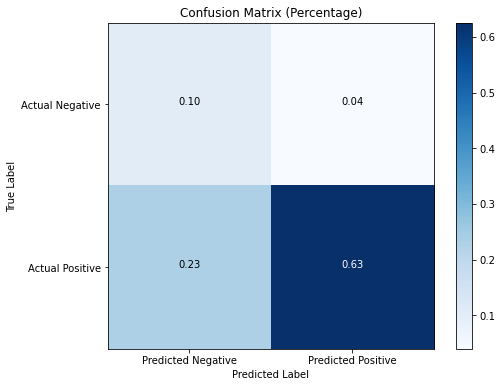

Mean Absolute Error: 0.2701908957415565
Root Mean Squared Error: 0.519798899326996
Training Score: 0.7738619676945668
Testing Score: 0.7298091042584435


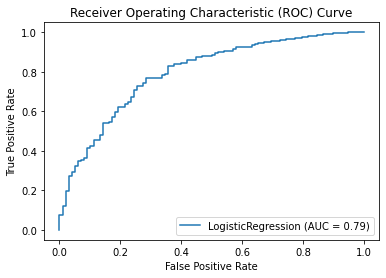

              Precision    Recall  F1-score     Support
0              0.311404  0.724490  0.435583   98.000000
1              0.940397  0.730703  0.822394  583.000000
accuracy       0.729809  0.729809  0.729809    0.729809
weighted avg   0.849881  0.729809  0.766729  681.000000
macro avg      0.625900  0.727597  0.628988  681.000000
Mean Absolute Error: 0.2701908957415565
Root Mean Squared Error: 0.519798899326996
Training Score: 0.7738619676945668
Testing Score: 0.7298091042584435
              Precision    Recall  F1-score     Support
0              0.311404  0.724490  0.435583   98.000000
1              0.940397  0.730703  0.822394  583.000000
accuracy       0.729809  0.729809  0.729809    0.729809
weighted avg   0.849881  0.729809  0.766729  681.000000
macro avg      0.625900  0.727597  0.628988  681.000000


In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.1],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'class_weight': [{0: w0, 1: w1}, 'balanced']  # Class weights
}

# Create Logistic Regression model
LRmodel = LogisticRegression()

# Perform grid search cross-validation
grid_search = GridSearchCV(LRmodel, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(vec_X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Display best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Display results of the best model
mae, rmse, train_score, test_score, classification_rep = model_results(best_model, vec_X_train, vec_X_test, y_train, y_test)
print('Mean Absolute Error:', mae) 
print('Root Mean Squared Error:', rmse)
print('Training Score:', train_score)
print('Testing Score:', test_score)

# Return Classification Report
print(classification_rep)

### RandomForest Classifier

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


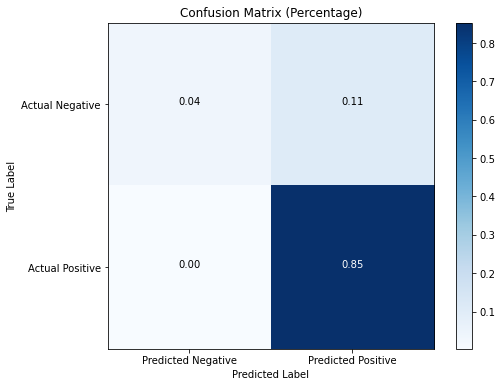

Mean Absolute Error: 0.11013215859030837
Root Mean Squared Error: 0.331861655799986
Training Score: 0.999632892804699
Testing Score: 0.8898678414096917


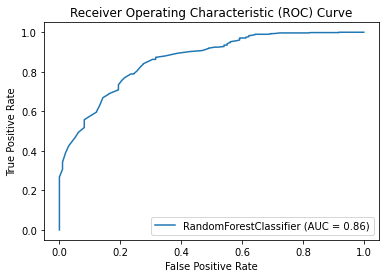

              Precision    Recall  F1-score     Support
0              0.925926  0.255102  0.400000   98.000000
1              0.888379  0.996569  0.939369  583.000000
accuracy       0.889868  0.889868  0.889868    0.889868
weighted avg   0.893782  0.889868  0.861751  681.000000
macro avg      0.907153  0.625836  0.669685  681.000000
Mean Absolute Error: 0.11013215859030837
Root Mean Squared Error: 0.331861655799986
Training Score: 0.999632892804699
Testing Score: 0.8898678414096917
              Precision    Recall  F1-score     Support
0              0.925926  0.255102  0.400000   98.000000
1              0.888379  0.996569  0.939369  583.000000
accuracy       0.889868  0.889868  0.889868    0.889868
weighted avg   0.893782  0.889868  0.861751  681.000000
macro avg      0.907153  0.625836  0.669685  681.000000


In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest model
RFmodel = RandomForestClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(RFmodel, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(vec_X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Display best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Display results of the best model
mae, rmse, train_score, test_score, classification_rep = model_results(best_model, vec_X_train, vec_X_test, y_train, y_test)
print('Mean Absolute Error:', mae) 
print('Root Mean Squared Error:', rmse)
print('Training Score:', train_score)
print('Testing Score:', test_score)

# Return Classification Report
print(classification_rep)

### Tuned RandomForest Classifier

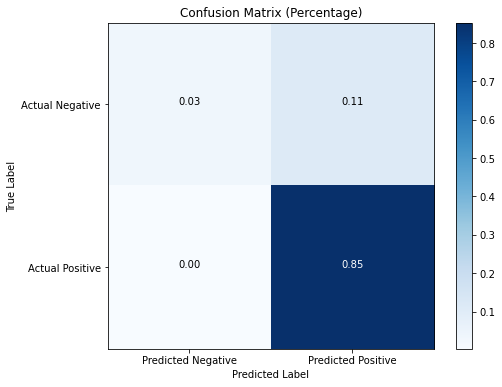

Mean Absolute Error: 0.1130690161527166
Root Mean Squared Error: 0.3362573659456646
Training Score: 0.999632892804699
Testing Score: 0.8869309838472834


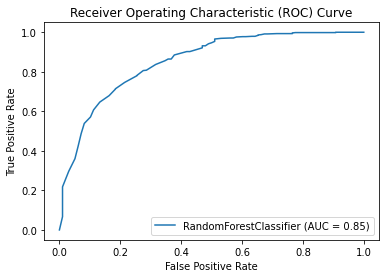

              Precision    Recall  F1-score     Support
0              0.920000  0.234694  0.373984   98.000000
1              0.885671  0.996569  0.937853  583.000000
accuracy       0.886931  0.886931  0.886931    0.886931
weighted avg   0.890611  0.886931  0.856709  681.000000
macro avg      0.902835  0.615632  0.655918  681.000000
Mean Absolute Error: 0.1130690161527166
Root Mean Squared Error: 0.3362573659456646
Training Score: 0.999632892804699
Testing Score: 0.8869309838472834
              Precision    Recall  F1-score     Support
0              0.920000  0.234694  0.373984   98.000000
1              0.885671  0.996569  0.937853  583.000000
accuracy       0.886931  0.886931  0.886931    0.886931
weighted avg   0.890611  0.886931  0.856709  681.000000
macro avg      0.902835  0.615632  0.655918  681.000000


In [200]:
from sklearn.ensemble import RandomForestClassifier

# Best hyperparameters found during grid search
best_params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

# Create Random Forest model with best hyperparameters
RFmodel_tuned = RandomForestClassifier(**best_params)

# Fit the model on the training data
RFmodel_tuned.fit(vec_X_train, y_train)

# Evaluate the tuned model
mae, rmse, train_score, test_score, classification_rep = model_results(RFmodel_tuned, vec_X_train, vec_X_test, y_train, y_test)

# Display results
print('Mean Absolute Error:', mae) 
print('Root Mean Squared Error:', rmse)
print('Training Score:', train_score)
print('Testing Score:', test_score)

# Print the classification report
print(classification_rep)

### Conclusion

- We recommend Svc tuned model which has a Recall score of 1.0 for positive sentiment tweet and accuracy score and precision score of 85.6. 
- One of the most used words was 'New', 'Case' for Apple, 'phone' and 'tablet' for google so GoldenGroup can invest in Accesories company for Iphone, Ipad and google products.
- GoldenGroup also has an opportunity of investing in eventplanner companies for Apple and Google as they both have positive feedback from users about events.
              
